# **Bios Final Project**

In [24]:
library(tidyverse)

As the FIDE World Chess Championship unfolds, I found it fitting to delve into the comprehensive chess database provided by TidyTuesday for my final project. Having competed in chess for over eight years, I am deeply interested in uncovering insights from this dataset and applying them to enhance my own gameplay.

The dataset includes the following variables:

	•	Game ID
	•	Rated (True/False)
	•	Start Time
	•	End Time
	•	Number of Turns
	•	Game Status
	•	Winner
	•	Time Increment
	•	White Player ID
	•	White Player Rating
	•	Black Player ID
	•	Black Player Rating
	•	All Moves in Standard Chess Notation
	•	Opening Eco (Standardized code for any given opening)
	•	Opening Name
	•	Opening Ply (Number of moves in the opening phase)

As a player rated around 1700, my focus is on analyzing this data to understand how I can optimize my chances of winning. Specifically, I aim to explore patterns, probabilities, and actionable insights that the dataset offers—helping me identify strategies to improve my gameplay and achieve better outcomes in future matches.

In [25]:
chess_data <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-10-01/chess.csv")

# head(chess_data)

Rows: 20058 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): game_id, victory_status, winner, time_increment, white_id, black_id...
dbl (6): start_time, end_time, turns, white_rating, black_rating, opening_ply
lgl (1): rated

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


To start, I wanted to explore how the starting position—specifically the color assigned (white or black)—impacts the overall outcome of a chess game across various rating ranges. In chess, it is often believed that white holds an advantage as it gets the first move, making it easier to build momentum and play offensively. However, I wanted to test this theory using the dataset to see if the so-called “white advantage” is a real phenomenon supported by data.

### **Line Chart: Win Rates by Rating Range**
The line chart highlights the win rates for White, Black, and draws across different player rating ranges. White consistently has a higher win rate across most rating ranges, particularly between 1000 and 2200, with a relatively stable performance hovering above 50%. Black maintains a slightly lower win rate throughout these ranges, with marginal increases at the higher levels. Notably, draw rates show a significant spike at the highest rating range (2400-2600), suggesting that higher-rated players are more likely to play balanced, defensive games that lead to draws. This chart reveals that games at lower ratings are often more decisive (fewer draws), whereas games among elite players demonstrate strategic equilibrium.

### **Stacked Bar Chart: Game Results by Rating Range**
The stacked bar chart reinforces the findings from the line chart by illustrating the proportions of outcomes (White wins, Black wins, and draws) for each rating range. White’s dominance is clearly visible across all ranges, with a larger proportion of White wins compared to Black. However, as player ratings increase, the share of draws becomes more prominent, particularly in the 2400-2600 range, where draws make up the majority of games. This trend suggests that higher-rated players, with their advanced skills and understanding of the game, tend to neutralize each other, leading to fewer decisive outcomes.

These charts demonstrate that while White generally holds an advantage at all rating levels, higher ratings correlate with an increased likelihood of balanced games and draws. This highlights the evolving nature of chess strategy and outcome predictability as players gain expertise. For me, this analysis suggests that as I continue to improve as a player, the impact of the side I play (white or black) will diminish. However, at my current 1700 rating, the data clearly indicates that playing as white provides a significant advantage.

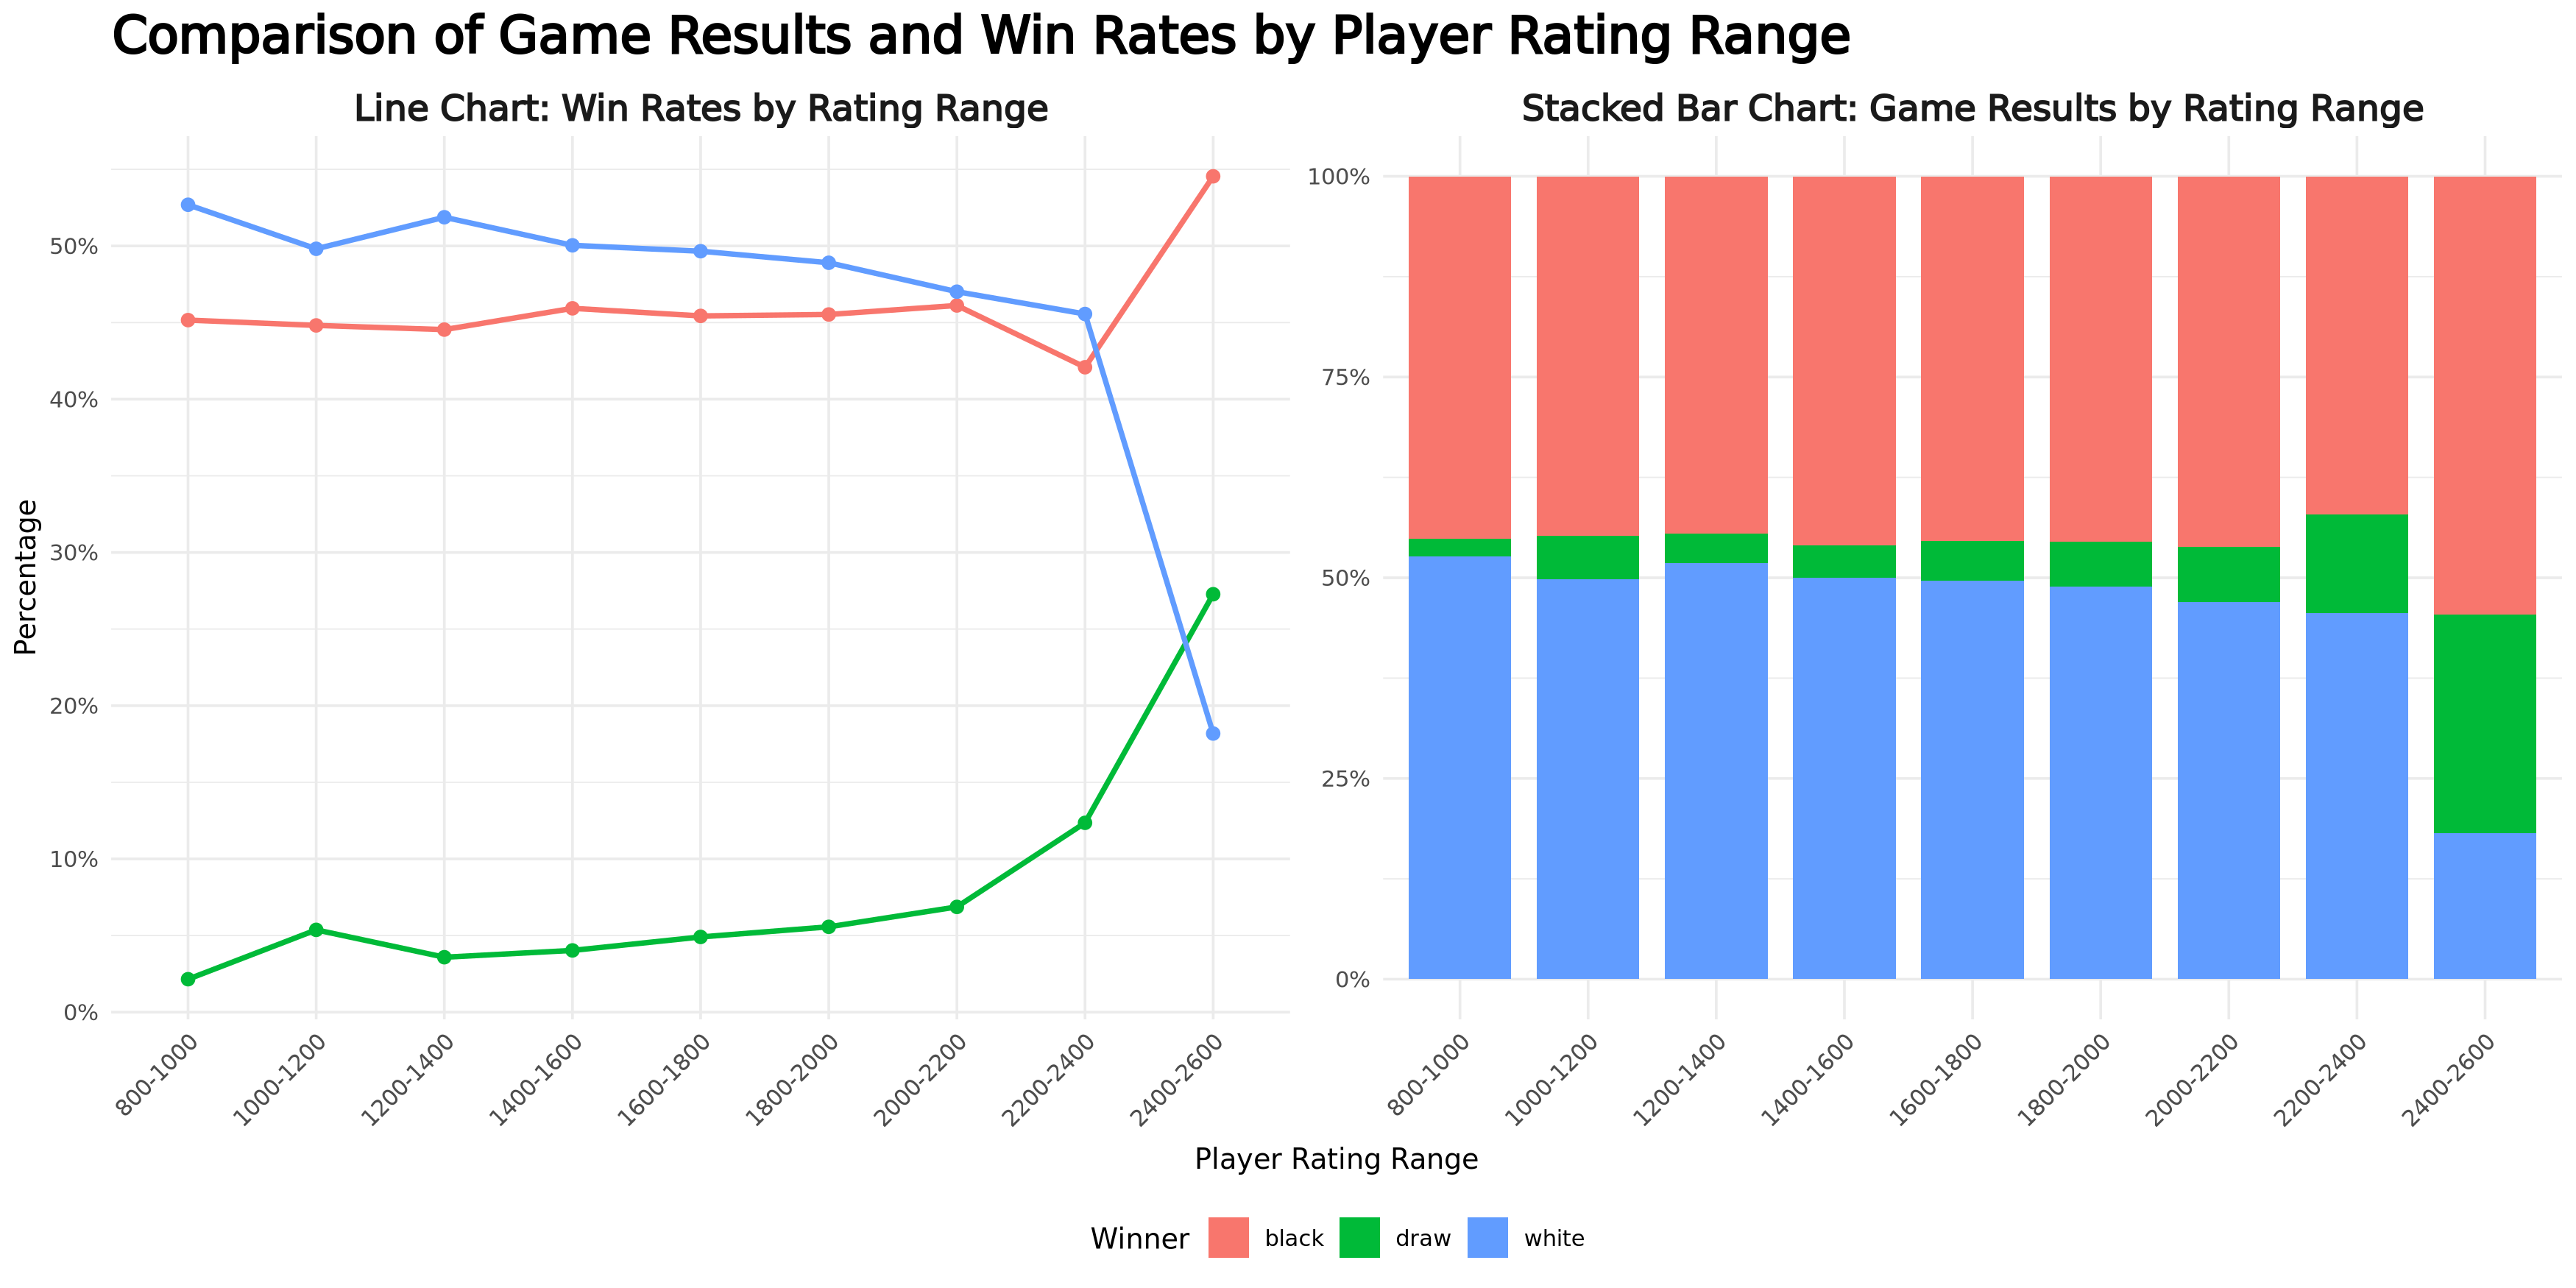

In [26]:
stacked_data <- chess_data %>%
  mutate(
    average_rating = (white_rating + black_rating) / 2,
    rating_range = cut(
      average_rating,
      breaks = seq(0, 3000, 200),  # Define rating ranges
      labels = paste0(seq(0, 2800, 200), "-", seq(200, 3000, 200)),
      include.lowest = TRUE
    )
  ) %>%
  group_by(rating_range, winner) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(rating_range) %>%
  mutate(
    share = count / sum(count),
    facet_label = "Stacked Bar Chart: Game Results by Rating Range"
  )

rating_win_rate <- chess_data %>%
  mutate(
    average_rating = (white_rating + black_rating) / 2,
    rating_range = cut(
      average_rating,
      breaks = seq(0, 3000, 200),
      labels = paste0(seq(0, 2800, 200), "-", seq(200, 3000, 200)),
      include.lowest = TRUE
    )
  ) %>%
  group_by(rating_range, winner) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(rating_range) %>%
  mutate(
    win_rate = count / sum(count),
    facet_label = "Line Chart: Win Rates by Rating Range"
  )

combined_data <- bind_rows(
  stacked_data %>%
    select(rating_range, share, winner, facet_label) %>%
    rename(y_value = share),
  rating_win_rate %>%
    select(rating_range, win_rate, winner, facet_label) %>%
    rename(y_value = win_rate)
)

options(repr.plot.width = 14, repr.plot.height = 7)

ggplot(combined_data, aes(x = rating_range, y = y_value, fill = winner)) +
  geom_bar(
    data = combined_data %>% filter(facet_label == "Stacked Bar Chart: Game Results by Rating Range"),
    stat = "identity",
    position = "fill",
    width = 0.8
  ) +
  geom_line(
    data = combined_data %>% filter(facet_label == "Line Chart: Win Rates by Rating Range"),
    aes(color = winner, group = winner),
    linewidth = 1
  ) +
  geom_point(
    data = combined_data %>% filter(facet_label == "Line Chart: Win Rates by Rating Range"),
    aes(color = winner),
    size = 2
  ) +
  scale_y_continuous(labels = scales::percent_format()) +
  facet_wrap(~facet_label, nrow = 1, scales = "free") +
  labs(
    title = "Comparison of Game Results and Win Rates by Player Rating Range",
    x = "Player Rating Range",
    y = "Percentage",
    fill = "Winner",
    color = "Winner"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom",
    strip.text = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 20, face = "bold")
  )

After confirming that white holds an advantage, my next step is to analyze how I can maximize my chances of winning when playing as white and, conversely, how to effectively prepare for defensive strategies when assigned black. Specifically, I aim to:

When Playing White: Identify the most successful openings and strategies at my current rating level (~1700) that lead to higher win rates. This involves exploring the dataset for openings commonly played by white, analyzing their success rates, and understanding the underlying principles that make these openings effective.

When Playing Black: Determine the openings white players are most likely to use against me and the defensive strategies that yield the best results. By studying the dataset, I can identify patterns in white’s opening choices and assess which defensive responses have been most successful for players in similar rating ranges.

To do this I created the following graphs: 

### **Top 10 Openings by Win Rate**
This chart provides a side-by-side comparison of the win rates for White and Black for the top 10 chess openings. White consistently shows a higher win rate across almost all openings, emphasizing the inherent advantage of starting the game. Openings like the Scandinavian Defense: Mieses-Kotroc Variation and the Horwitz Defense particularly favor White, with win rates surpassing 50%. Black win rates are generally lower but are more competitive in openings such as the Sicilian Defense and the Van’t Kruijs Opening. This chart highlights how some openings strongly favor one side over the other, guiding players to choose openings that align with their style and color.

### **Opening Effectiveness by Game Outcome**
This chart breaks down the outcomes (White wins, Black wins, and draws) for the same top 10 openings. It reinforces the dominance of White across most openings, with the proportion of White wins being significantly higher than Black wins. However, draws are relatively consistent across openings, forming a notable proportion in the Scandinavian Defense and Sicilian Defense, suggesting these openings lead to more balanced play. Conversely, openings like Van’t Kruijs Opening and Horwitz Defense have fewer draws, indicating they result in more decisive games. This breakdown helps identify openings that promote balance versus aggressive play.

### **Opening Popularity vs. Effectiveness**
This scatter plot combines three critical factors—popularity (total games played), White win rate (effectiveness), and draw rate (point size)—to give a comprehensive overview of opening dynamics. Popular openings like the Sicilian Defense and the Scotch Game exhibit moderate White win rates but also lead to relatively high proportions of draws. On the other hand, less common openings like the Scandinavian Defense: Mieses-Kotroc Variation show a high White win rate, making them underrated choices for White players. This chart highlights the balance between choosing well-known openings versus experimenting with less common, effective ones.

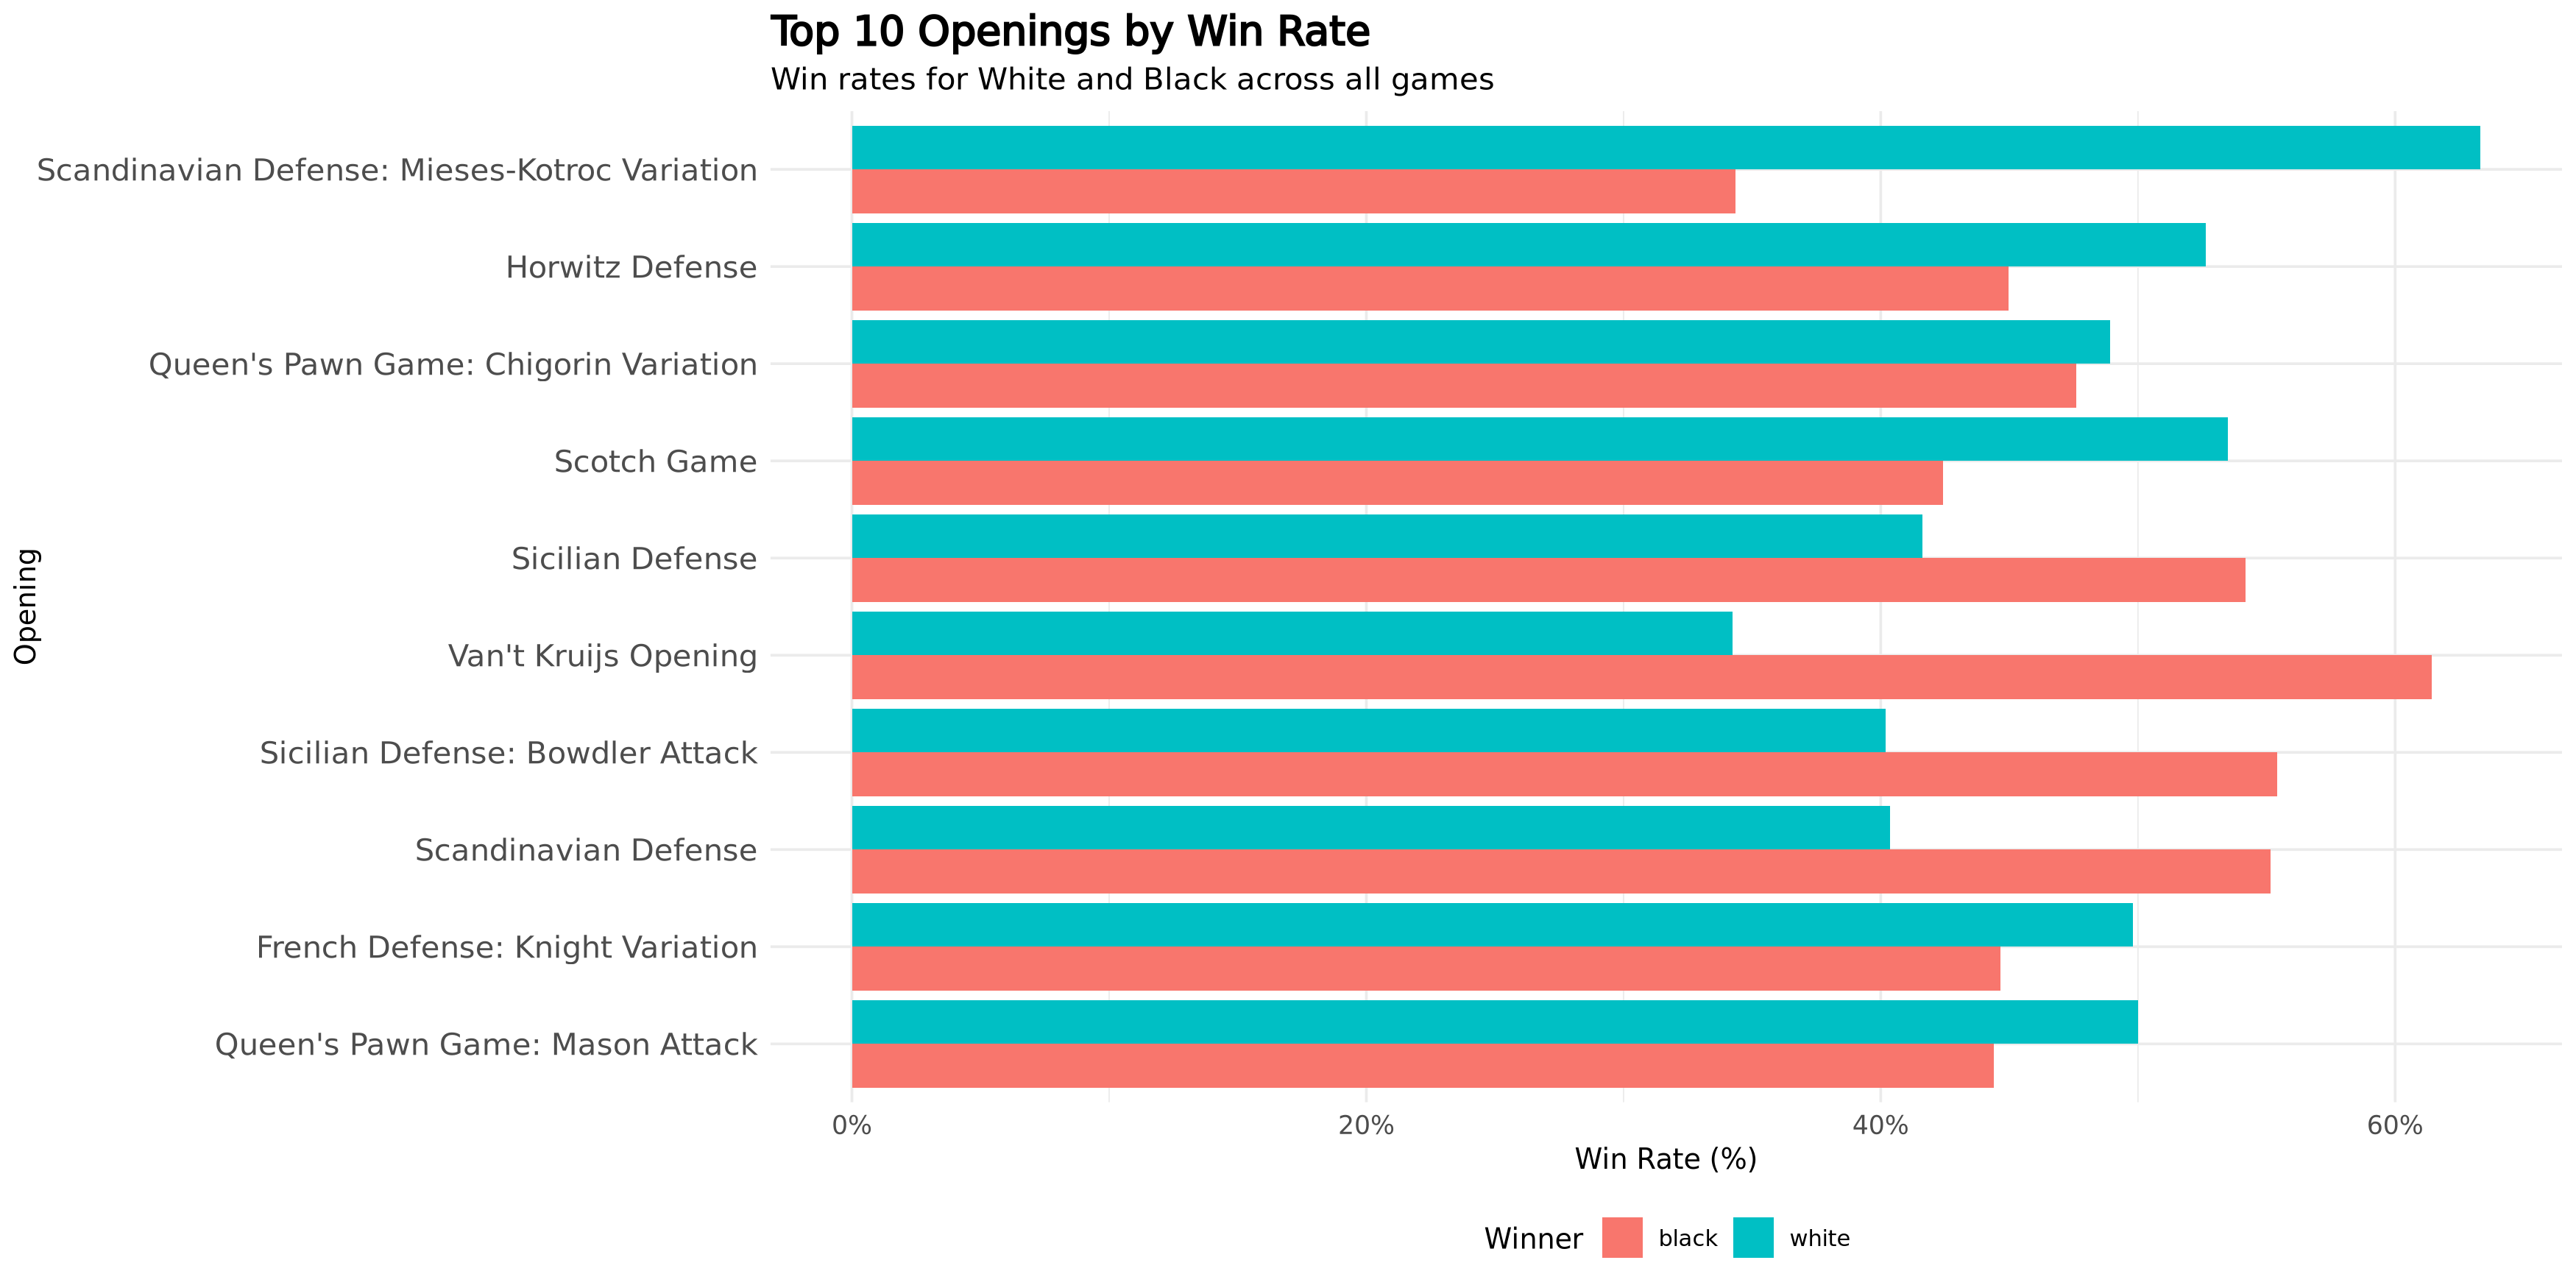

In [27]:
opening_win_rate <- chess_data %>%
  group_by(opening_name, winner) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(opening_name) %>%
  mutate(win_rate = count / sum(count)) %>%
  filter(winner %in% c("white", "black")) 

top_openings <- chess_data %>%
  count(opening_name, sort = TRUE) %>%
  slice_head(n = 10) %>%
  pull(opening_name)

opening_win_rate_filtered <- opening_win_rate %>%
  filter(opening_name %in% top_openings)

ggplot(opening_win_rate_filtered, aes(x = reorder(opening_name, win_rate), y = win_rate, fill = winner)) +
  geom_col(position = "dodge") +
  coord_flip() +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(
    title = "Top 10 Openings by Win Rate",
    subtitle = "Win rates for White and Black across all games",
    x = "Opening",
    y = "Win Rate (%)",
    fill = "Winner"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12), 
    axis.text.x = element_text(size = 10),  
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    legend.position = "bottom"
  )

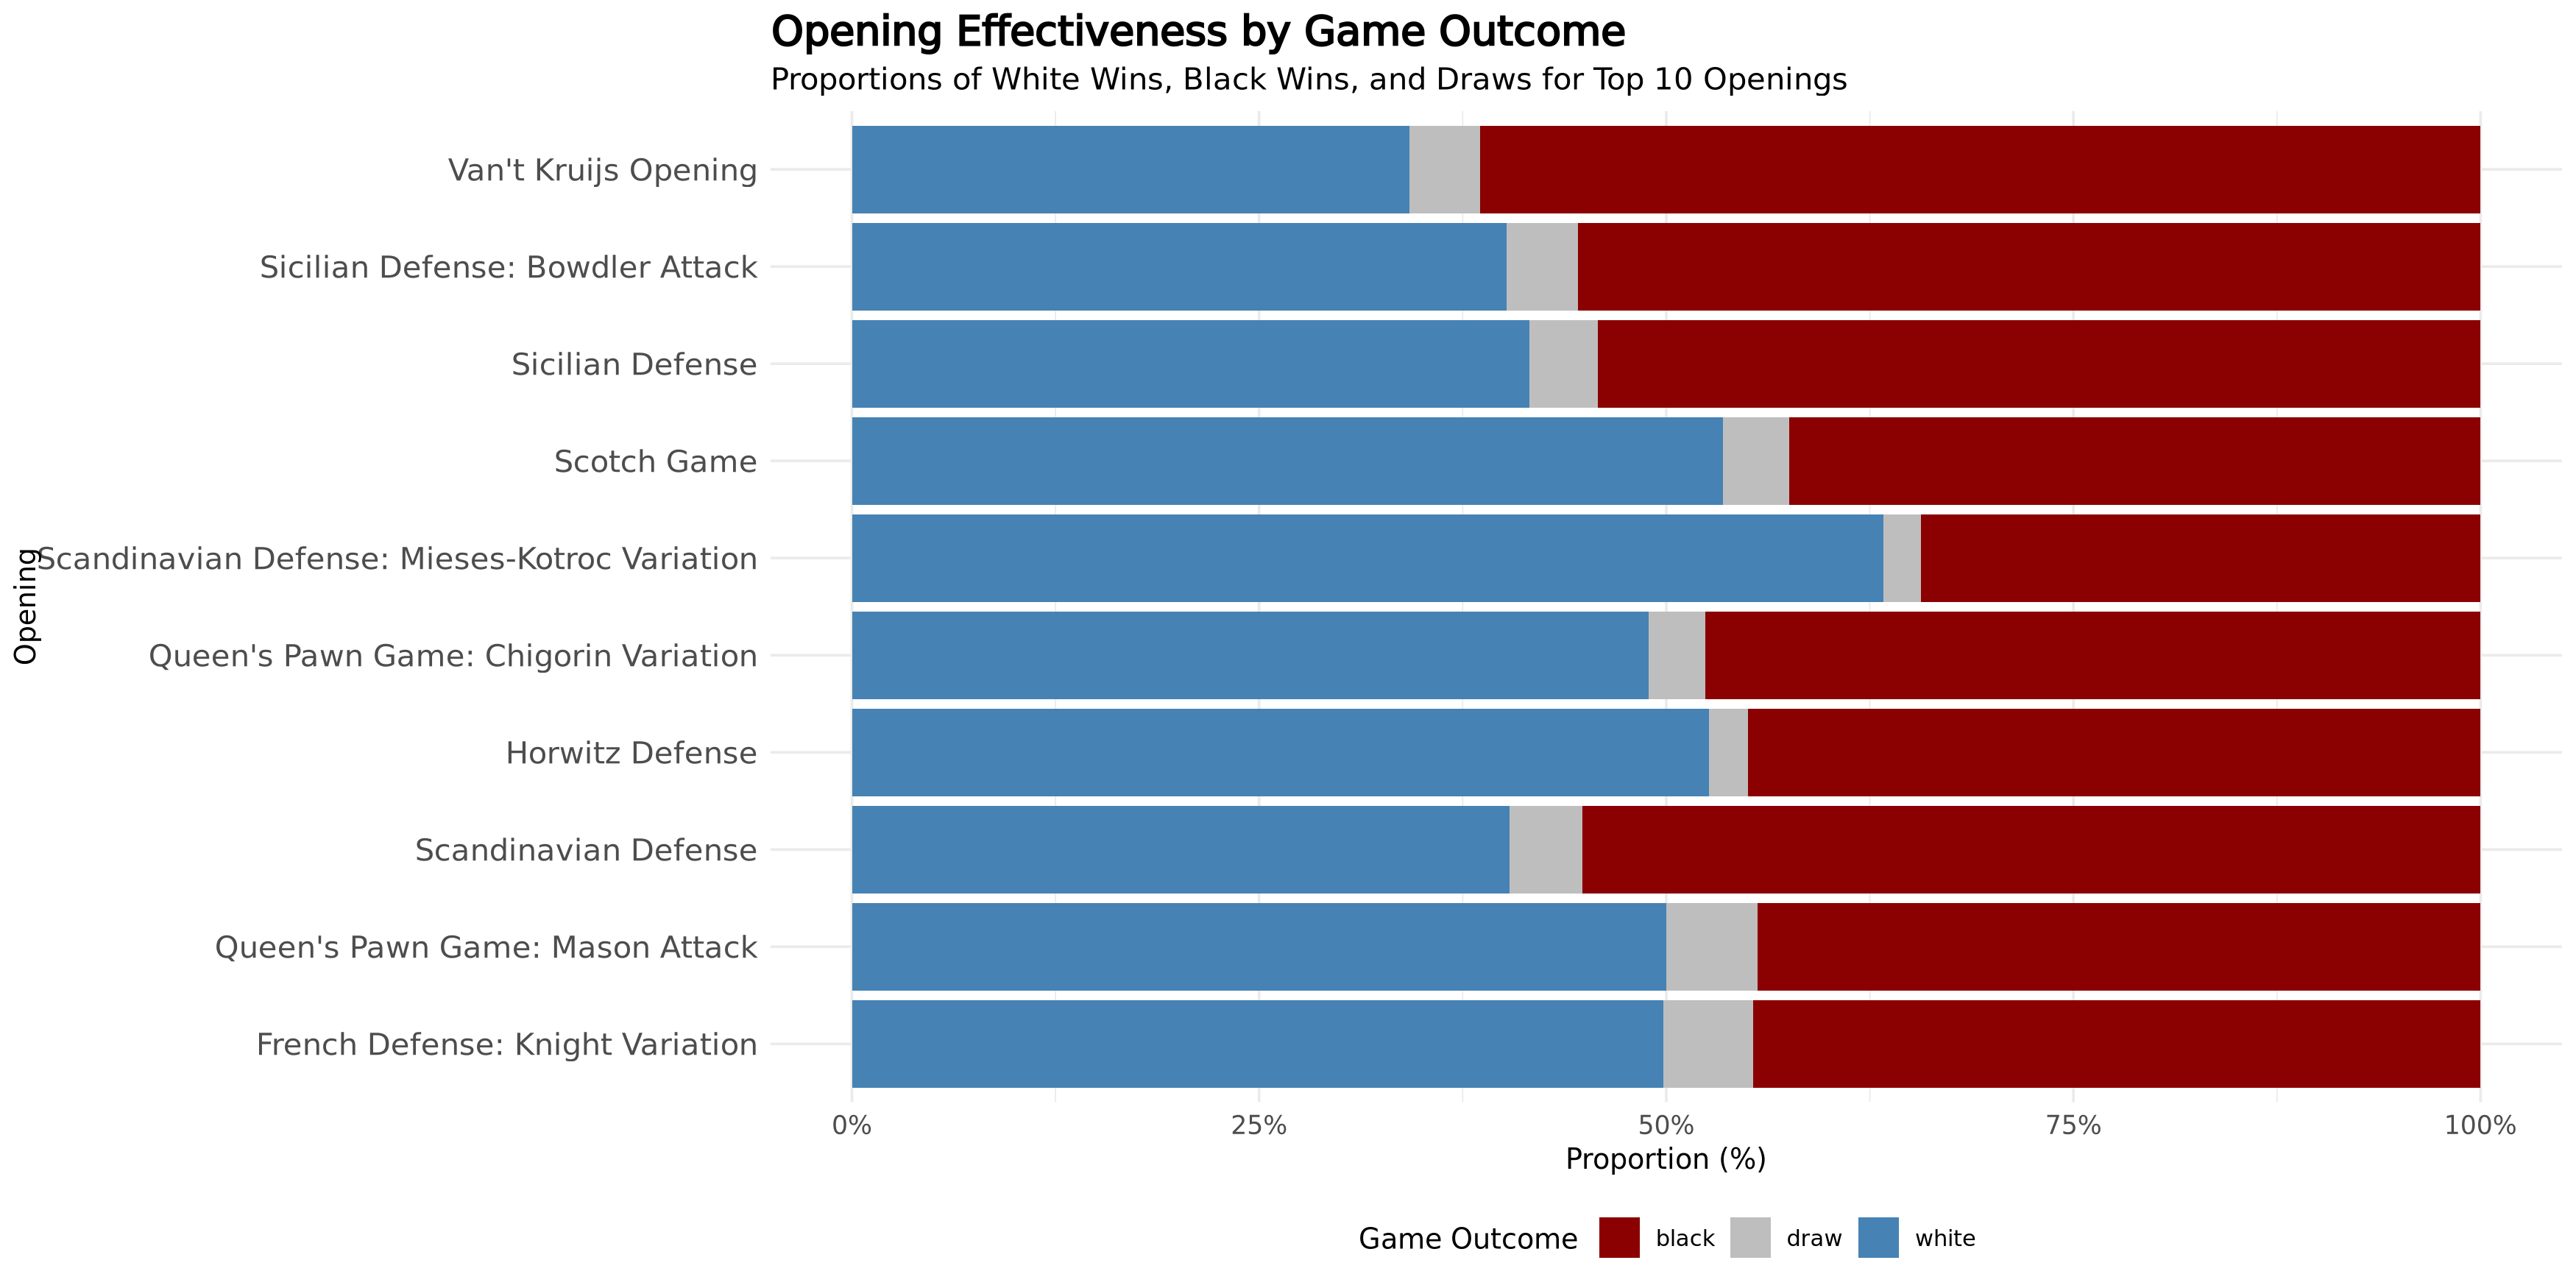

In [28]:
opening_outcomes <- chess_data %>%
  group_by(opening_name, winner) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(opening_name) %>%
  mutate(proportion = count / sum(count))

top_openings <- chess_data %>%
  count(opening_name, sort = TRUE) %>%
  slice_head(n = 10) %>%
  pull(opening_name)

opening_outcomes_filtered <- opening_outcomes %>%
  filter(opening_name %in% top_openings)

ggplot(opening_outcomes_filtered, aes(x = reorder(opening_name, -proportion), y = proportion, fill = winner)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_fill_manual(
    values = c("white" = "steelblue", "black" = "darkred", "draw" = "gray"),
    name = "Game Outcome"
  ) +
  labs(
    title = "Opening Effectiveness by Game Outcome",
    subtitle = "Proportions of White Wins, Black Wins, and Draws for Top 10 Openings",
    x = "Opening",
    y = "Proportion (%)",
    fill = "Outcome"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    legend.position = "bottom"
  )

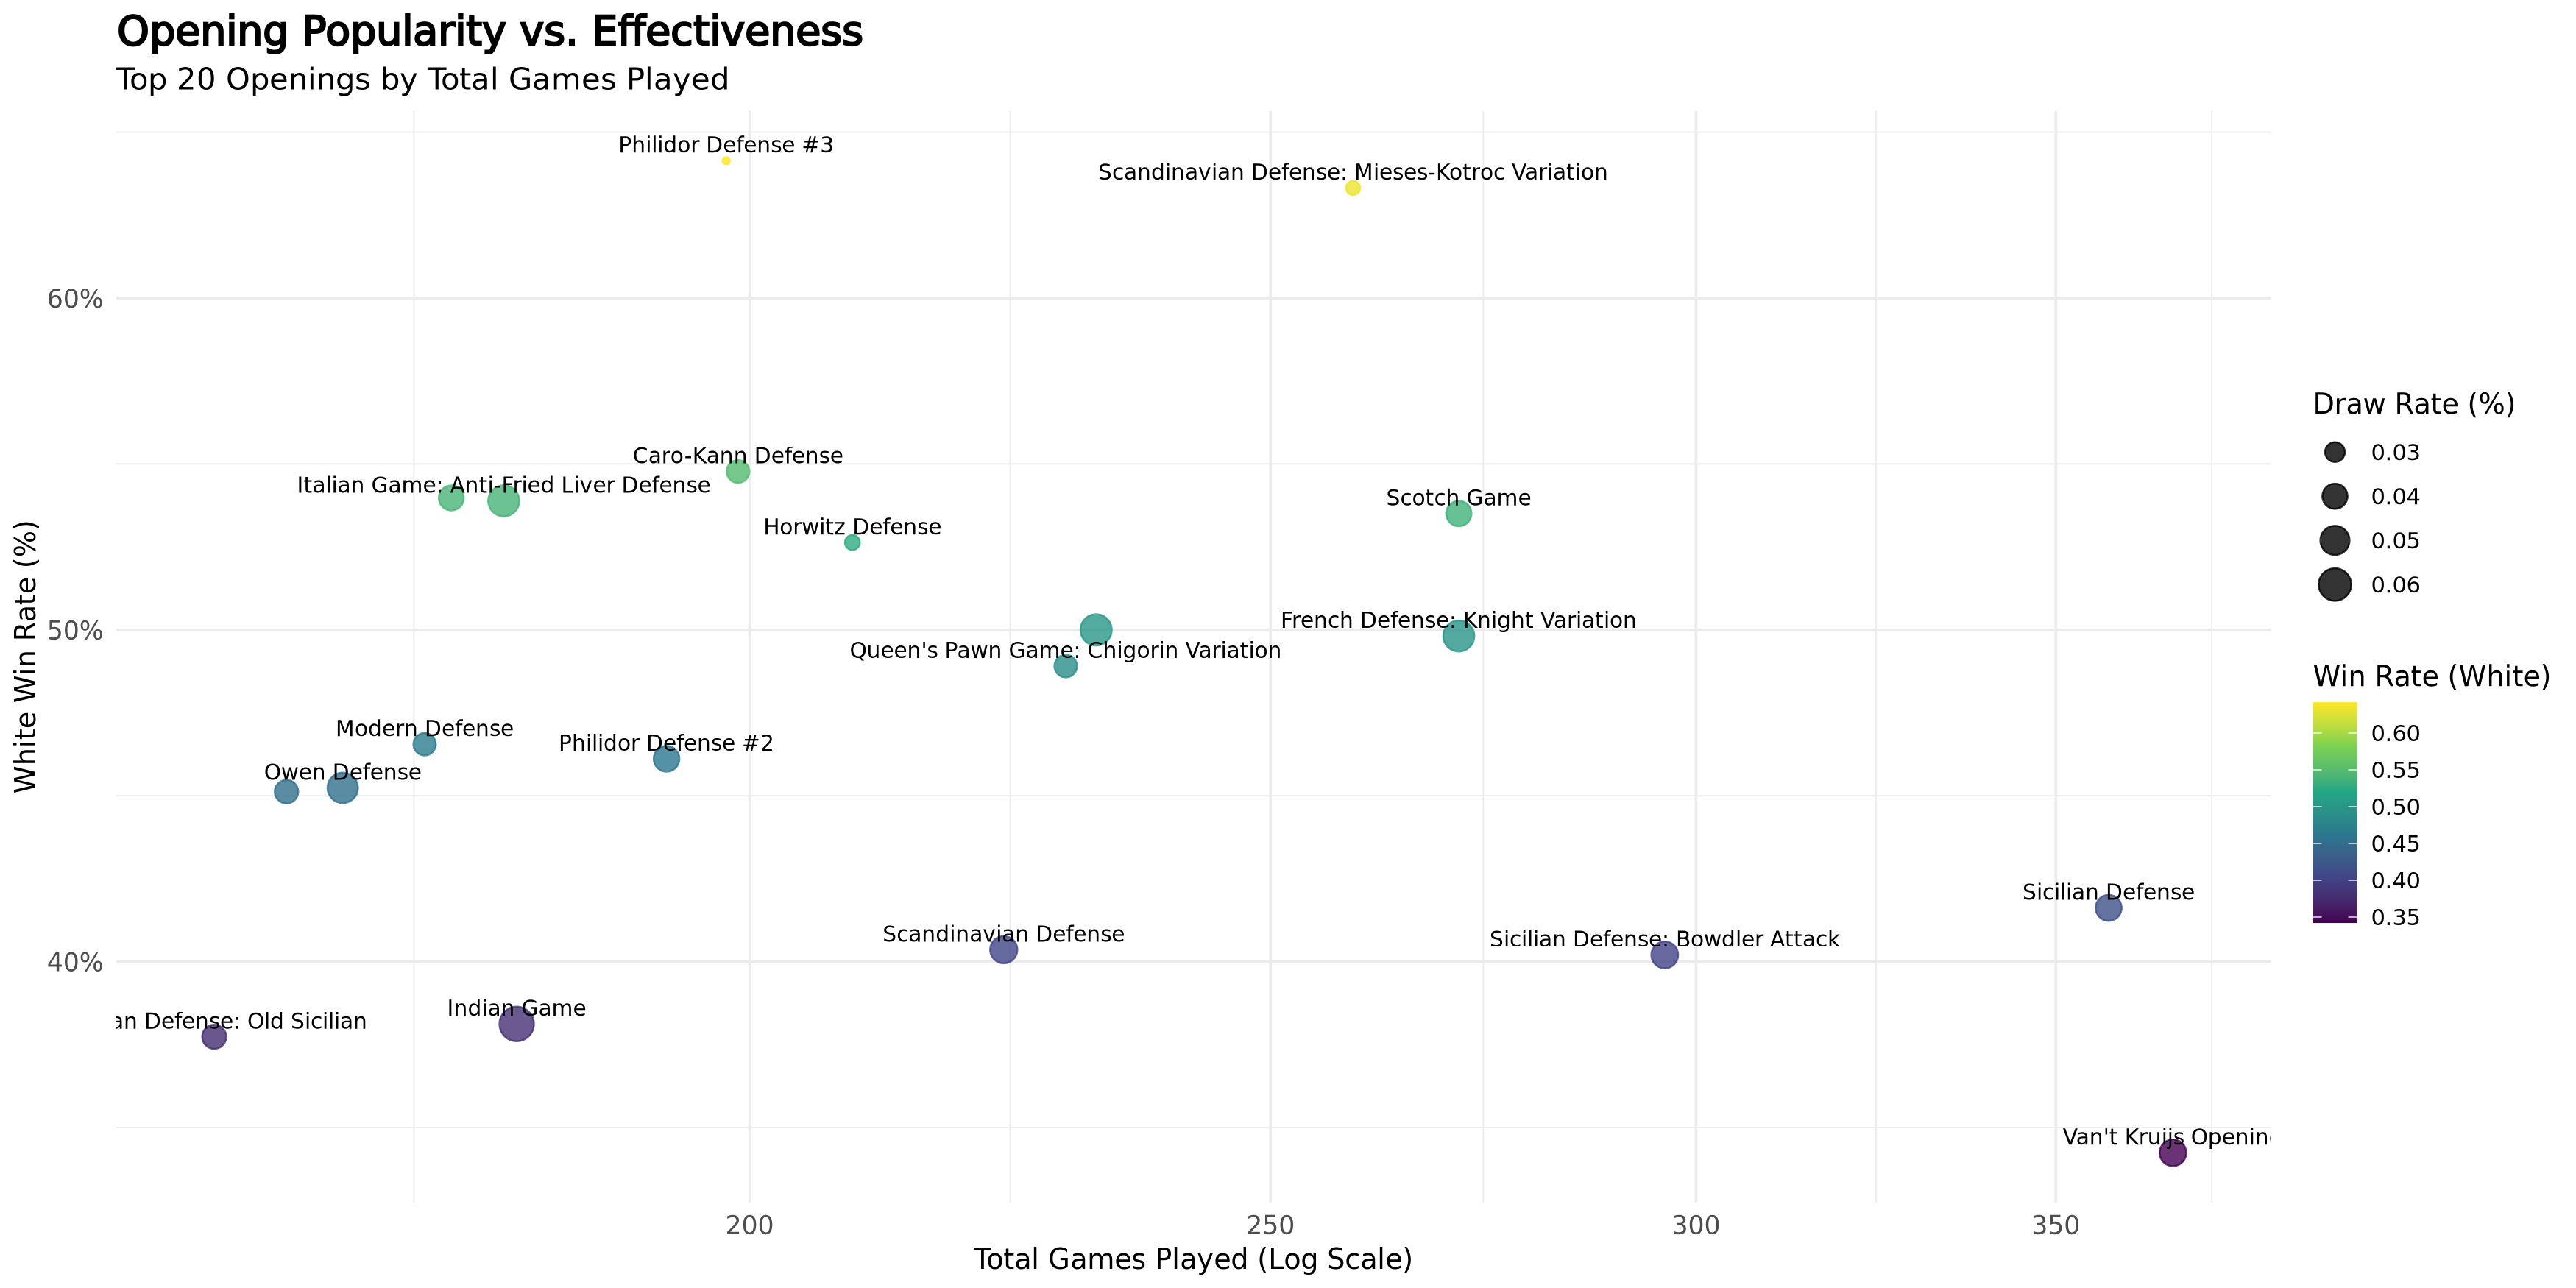

In [29]:
library(tidyverse)

opening_stats <- chess_data %>%
  group_by(opening_name) %>%
  summarize(
    total_games = n(),
    white_win_rate = mean(winner == "white", na.rm = TRUE),
    black_win_rate = mean(winner == "black", na.rm = TRUE),
    draw_rate = mean(winner == "draw", na.rm = TRUE),
    .groups = "drop"
  )

top_openings <- opening_stats %>%
  arrange(desc(total_games)) %>%
  slice_head(n = 20)

top_openings <- top_openings %>%
  mutate(label = opening_name) 

ggplot(top_openings, aes(x = total_games, y = white_win_rate, size = draw_rate)) +
  geom_point(aes(color = white_win_rate), alpha = 0.8) +
  geom_text(
    aes(label = label),
    size = 3, 
    check_overlap = TRUE,  
    hjust = 0.5, 
    vjust = -0.5
  ) +
  scale_x_log10(labels = scales::comma_format()) + 
  scale_y_continuous(labels = scales::percent_format()) +
  scale_color_viridis_c(name = "Win Rate (White)") +
  labs(
    title = "Opening Popularity vs. Effectiveness",
    subtitle = "Top 20 Openings by Total Games Played",
    x = "Total Games Played (Log Scale)",
    y = "White Win Rate (%)",
    size = "Draw Rate (%)",
    color = "White Win Rate (%)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    legend.position = "right"
  )

Lastly, I wanted to explore how understanding winning openings and the most effective defenses can help me better prepare from the black perspective. Additionally, I aim to uncover any correlations within the dataset—such as those related to time controls or game length—that might provide subtle advantages. 

### **Game Length Analysis**
This chart reveals how the number of turns in a chess game correlates with the outcome. Shorter games (0-20 turns) tend to be highly decisive, with a lower proportion of draws and a significant advantage for White. As the number of turns increases (21-40 and 41-60 turns), the games appear more balanced, with draws becoming more frequent and the win rates for White and Black converging slightly. In games with 61-80 moves or more, draws dominate the outcomes, suggesting that longer games typically result from evenly matched players reaching balanced endgames. This trend reinforces the idea that decisive outcomes are more common in shorter, tactical games, while longer games reflect strategic parity and deeper positional play.

### **Time Control Analysis**
This chart demonstrates how game outcomes vary across different time control categories. In fast-paced formats like Bullet and Blitz, White maintains a consistent advantage, but Black also achieves a reasonable number of wins, possibly due to time pressure-induced errors. Rapid games, which offer players more time to think, see a higher proportion of draws, reflecting the reduced likelihood of blunders. The "Other" time control category likely encompasses a mix of irregular settings, leading to a more varied distribution of outcomes. Overall, this analysis highlights that faster time controls favor decisive outcomes, while longer time controls allow players to achieve greater balance and strategic depth, as evidenced by the increase in draws.


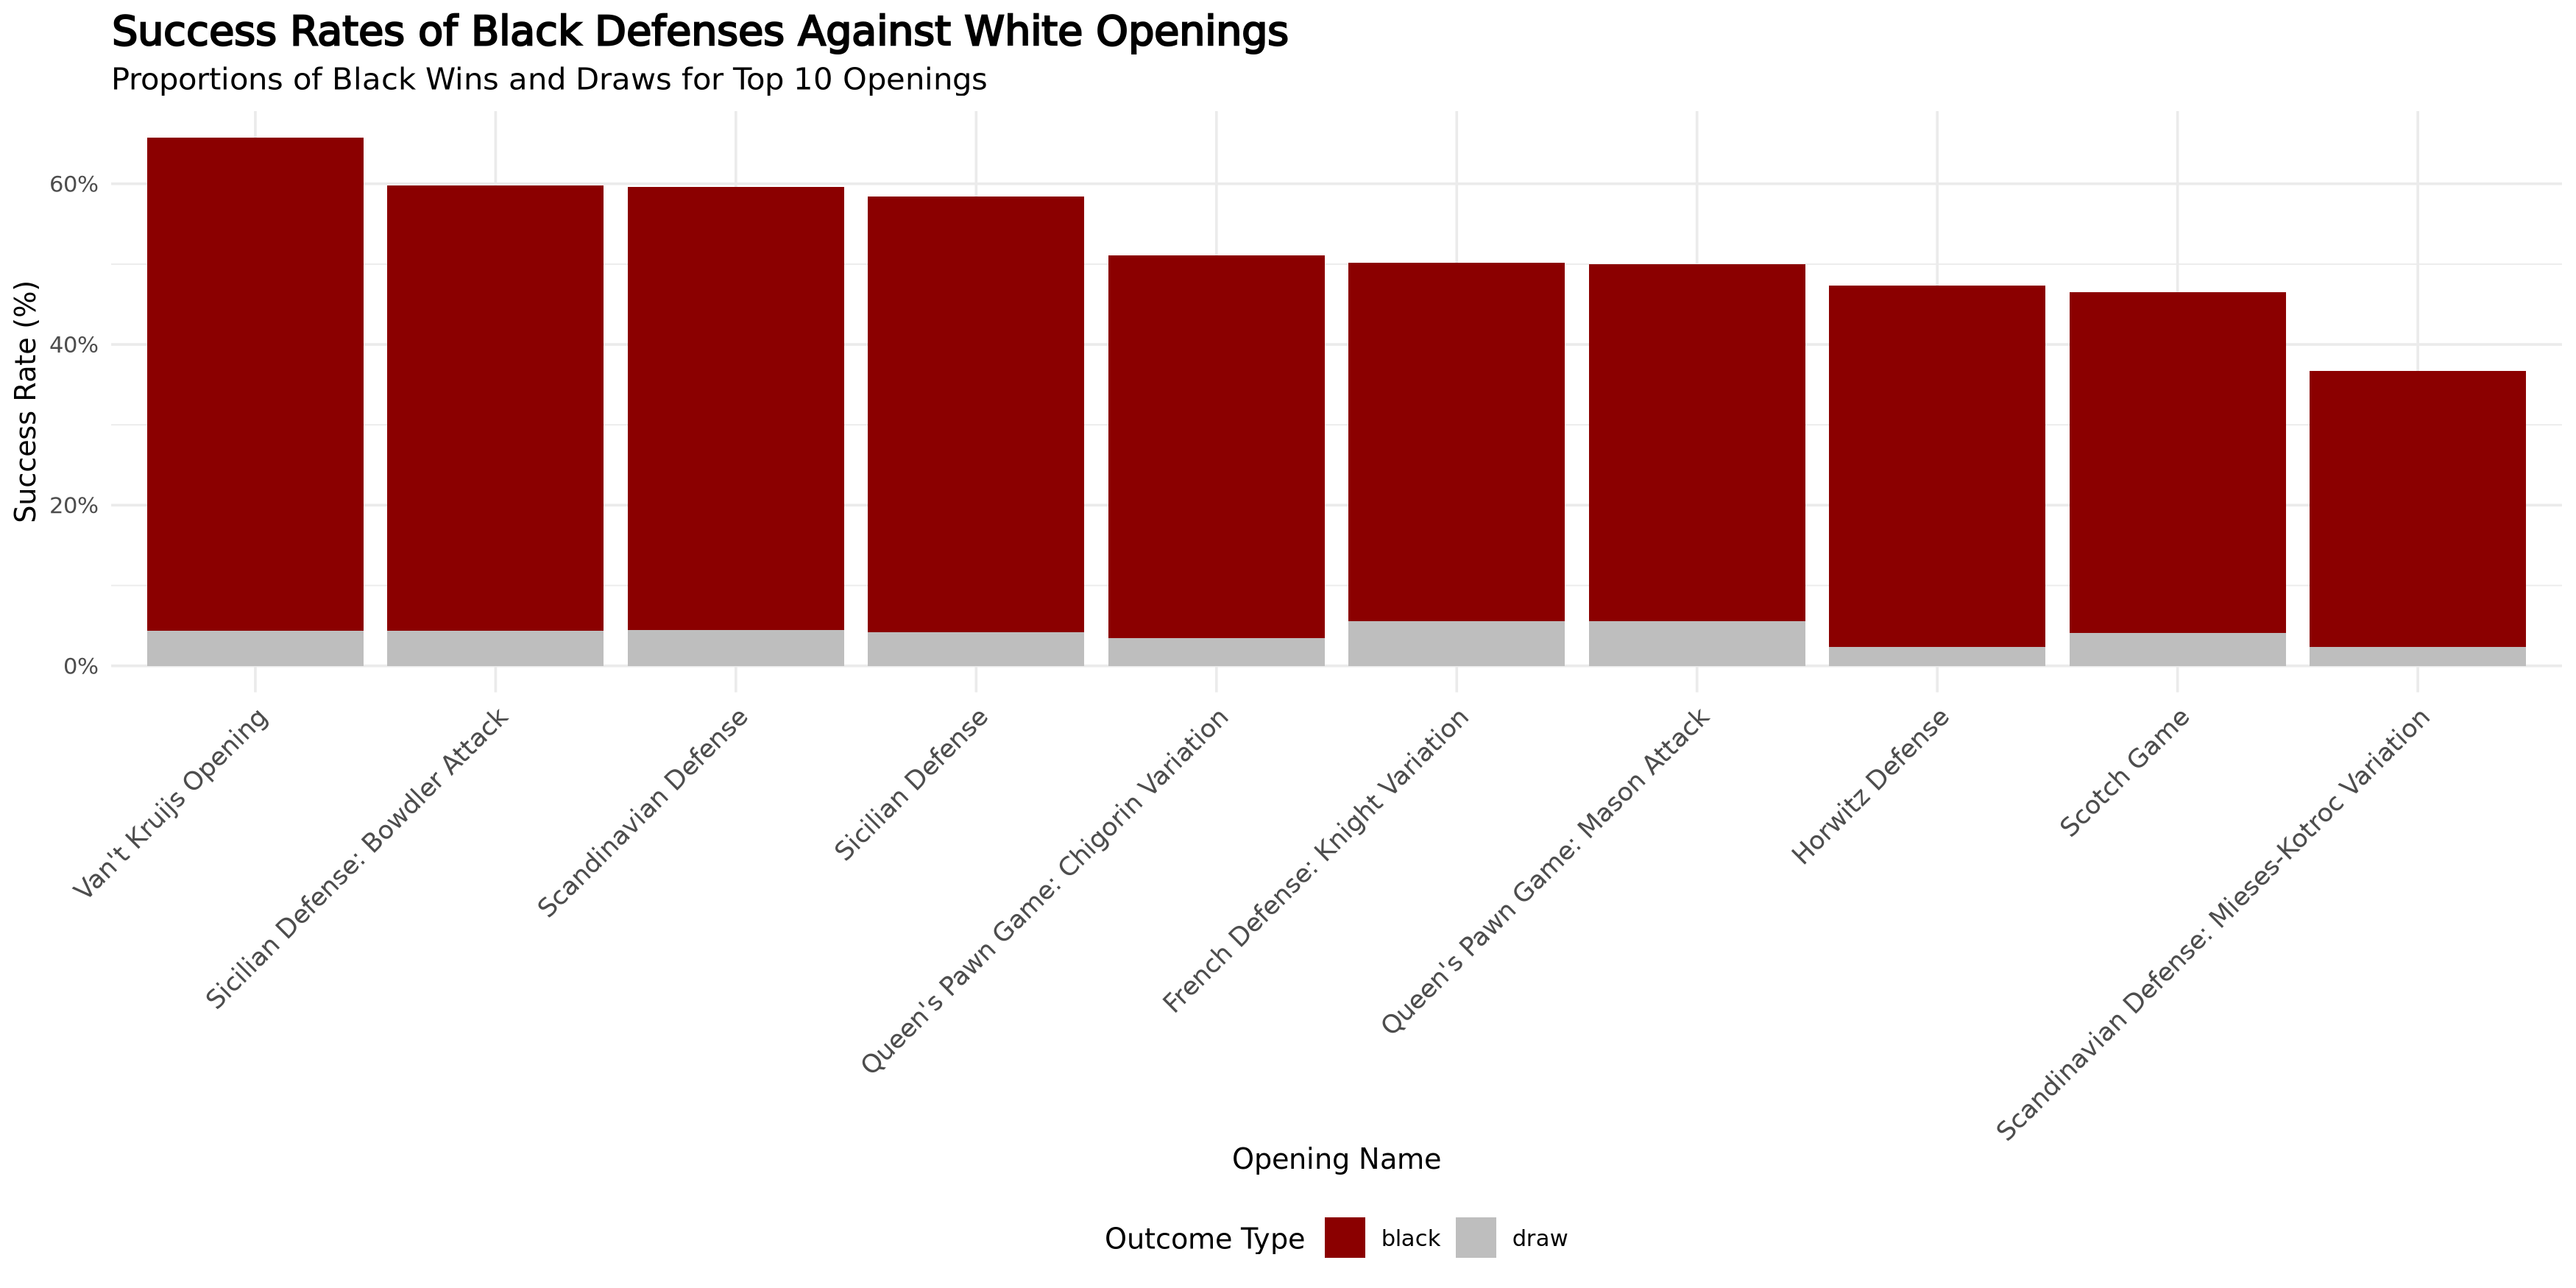

In [30]:
black_defense_success <- chess_data %>%
  group_by(opening_name, winner) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(opening_name) %>%
  mutate(
    win_rate = count / sum(count),
    combined_success_rate = if_else(winner %in% c("black", "draw"), win_rate, NA_real_)
  ) %>%
  filter(!is.na(combined_success_rate)) %>%
  filter(winner %in% c("black", "draw"))

top_openings <- chess_data %>%
  count(opening_name, sort = TRUE) %>%
  slice_head(n = 10) %>%
  pull(opening_name)

black_defense_success_filtered <- black_defense_success %>%
  filter(opening_name %in% top_openings)

ggplot(black_defense_success_filtered, aes(x = reorder(opening_name, -combined_success_rate), y = win_rate, fill = winner)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_fill_manual(
    values = c("black" = "darkred", "draw" = "gray"),
    name = "Outcome Type"
  ) +
  labs(
    title = "Success Rates of Black Defenses Against White Openings",
    subtitle = "Proportions of Black Wins and Draws for Top 10 Openings",
    x = "Opening Name",
    y = "Success Rate (%)",
    fill = "Outcome"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    legend.position = "bottom"
  )

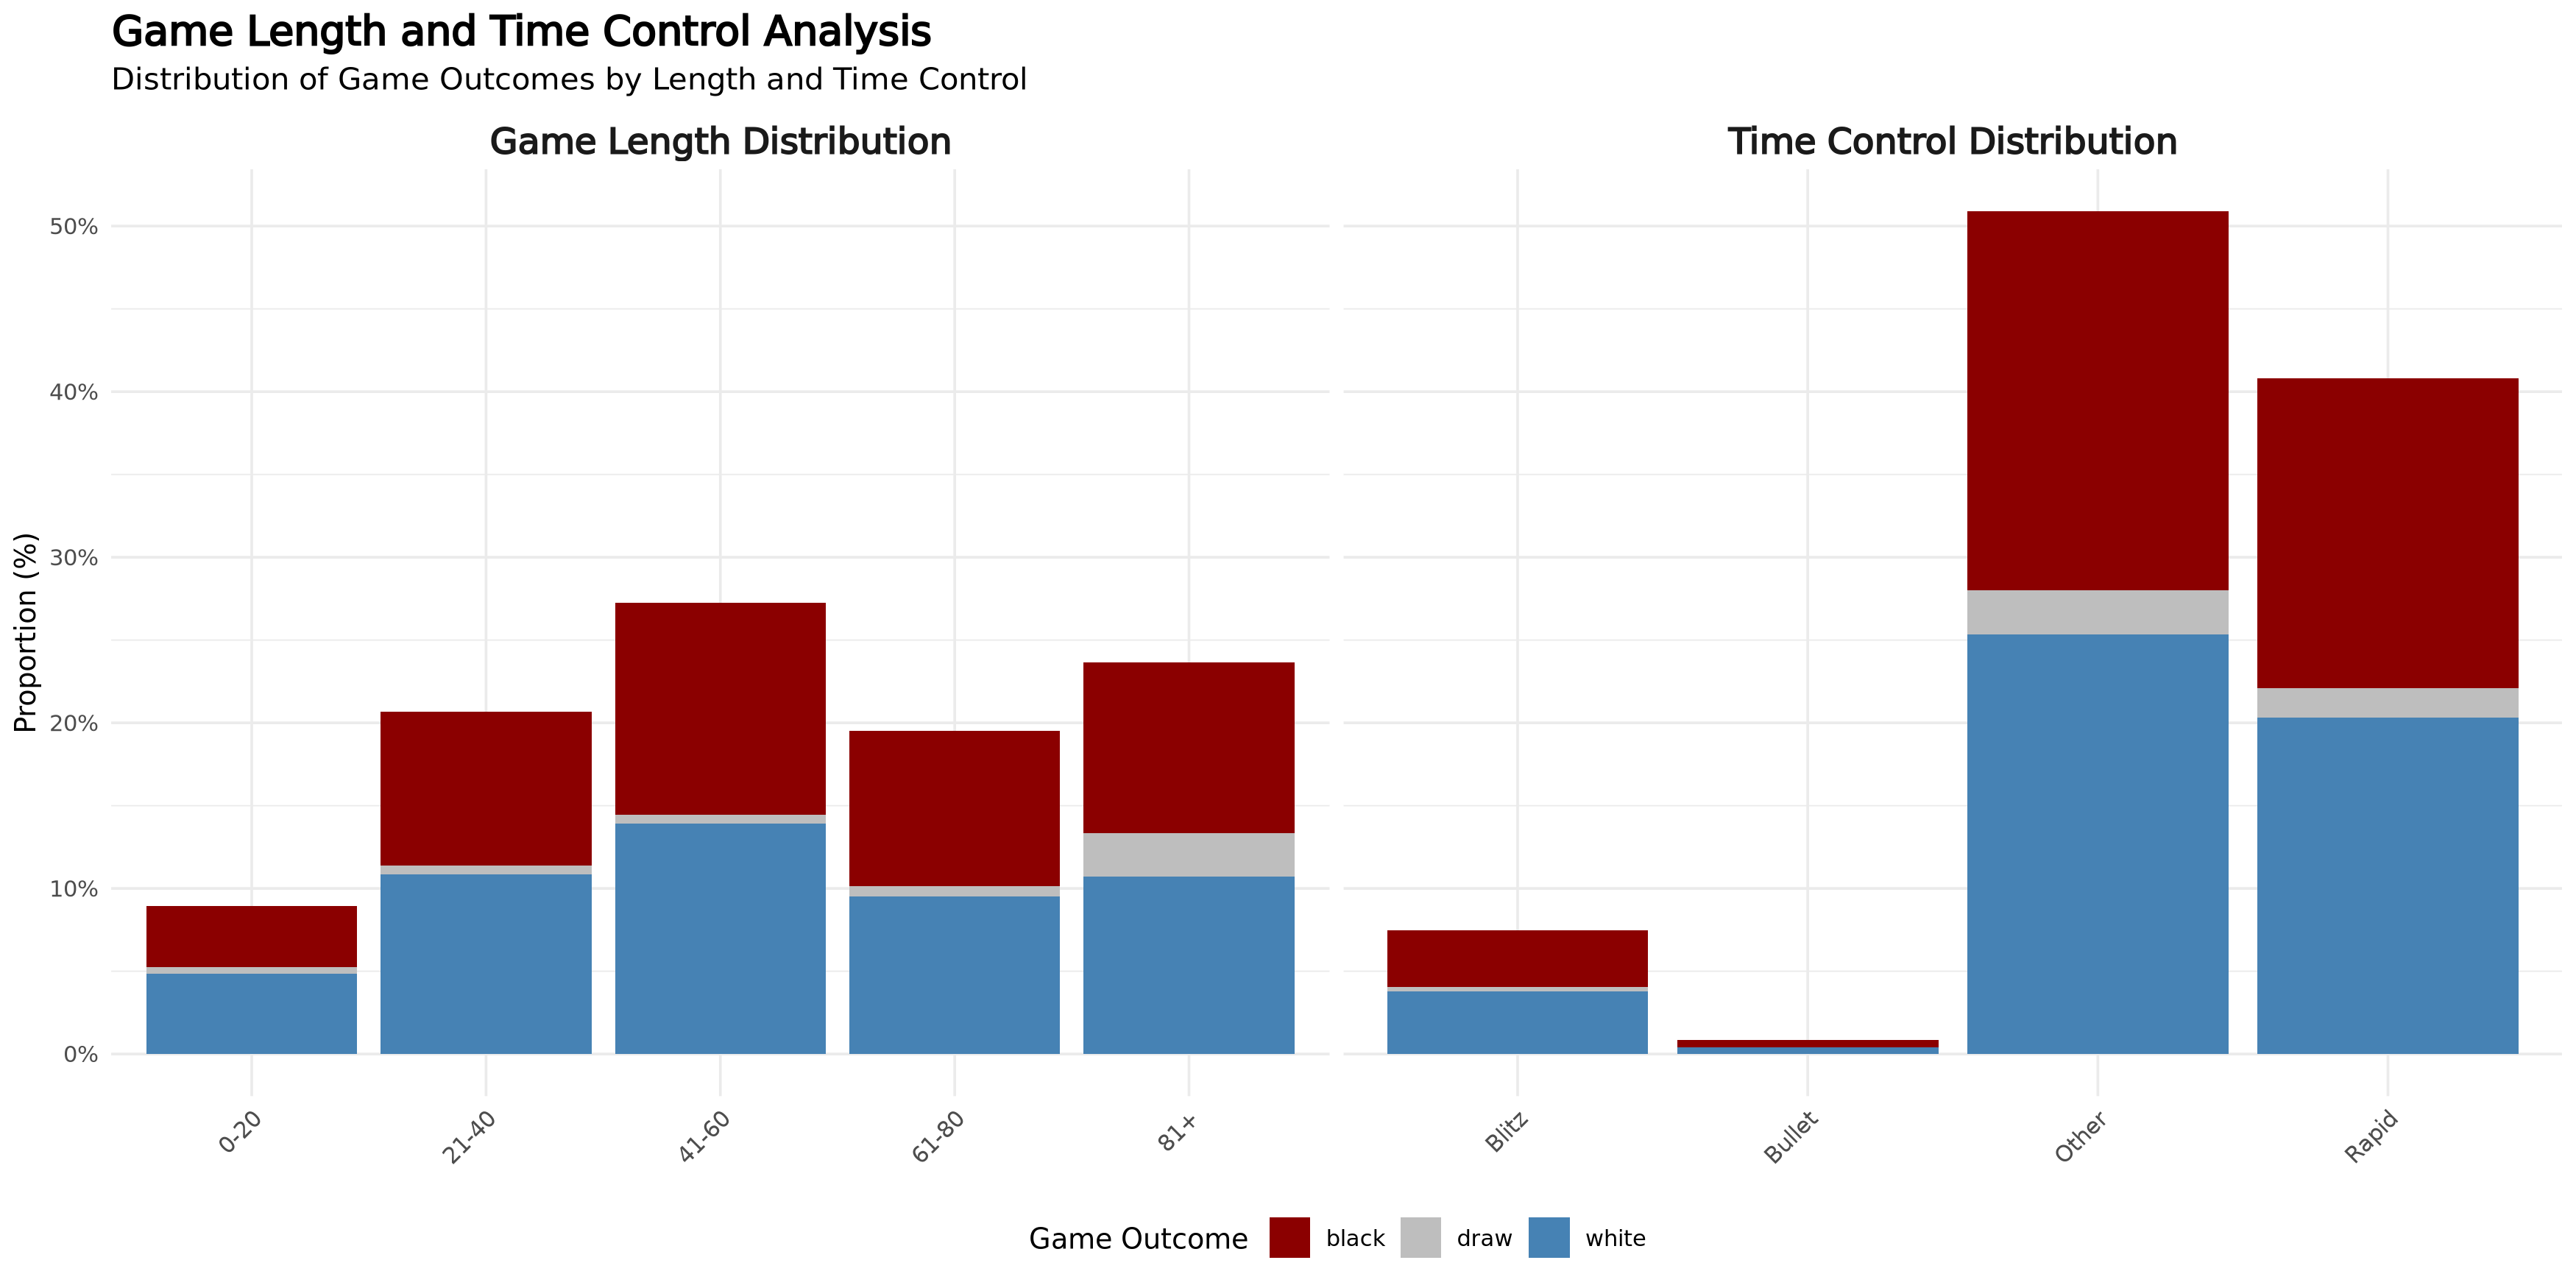

In [33]:
chess_data <- chess_data %>%
  mutate(
    time_control_category = case_when(
      str_detect(time_increment, "1\\+0|2\\+1") ~ "Bullet",
      str_detect(time_increment, "3\\+2|5\\+0") ~ "Blitz",
      str_detect(time_increment, "10\\+0|15\\+10") ~ "Rapid",
      TRUE ~ "Other"
    )
  )

game_length_data <- chess_data %>%
  mutate(
    game_length_category = cut(
      turns,
      breaks = c(0, 20, 40, 60, 80, Inf),
      labels = c("0-20", "21-40", "41-60", "61-80", "81+"),
      include.lowest = TRUE
    )
  ) %>%
  group_by(game_length_category, winner) %>%
  summarize(count = n(), .groups = "drop") %>%
  mutate(proportion = count / sum(count), facet_label = "Game Length Distribution")

time_control_data <- chess_data %>%
  group_by(time_control_category, winner) %>%
  summarize(count = n(), .groups = "drop") %>%
  mutate(proportion = count / sum(count), facet_label = "Time Control Distribution")

combined_data <- bind_rows(
  game_length_data %>% rename(category = game_length_category),
  time_control_data %>% rename(category = time_control_category)
)

ggplot(combined_data, aes(x = category, y = proportion, fill = winner)) +
  geom_bar(stat = "identity", position = "stack") +
  facet_wrap(~facet_label, nrow = 1, scales = "free_x") +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_fill_manual(
    values = c("white" = "steelblue", "black" = "darkred", "draw" = "gray"),
    name = "Game Outcome"
  ) +
  labs(
    title = "Game Length and Time Control Analysis",
    subtitle = "Distribution of Game Outcomes by Length and Time Control",
    x = NULL,
    y = "Proportion (%)",
    fill = "Winner"
  ) +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom"
  )